# EDA
The logic of EDA process:
1. **Check the basic situation of the data set**: the data type of each feature, whether there are missing values, outliers
2. **Data visualization**: Visualize the relationship between individual features and y and the relationship between multiple variables and y
3. **Data processing**: Process the data based on the data set, such as converting multi-classification variables to one-hot encoding, binary classification variables to 0-1 encoding, and time variables to time conversion
4. **Data verification**: Ensure that the data is directly available when the model is built

### Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

## 1 Description of dataset

In [3]:
# load the dataset
df=pd.read_csv('../data/raw/bank/bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset has 45,211 data points and 17 features, and none of the features have missing values.

## 2 Visualisation

### 2.1 individual Feature distribution

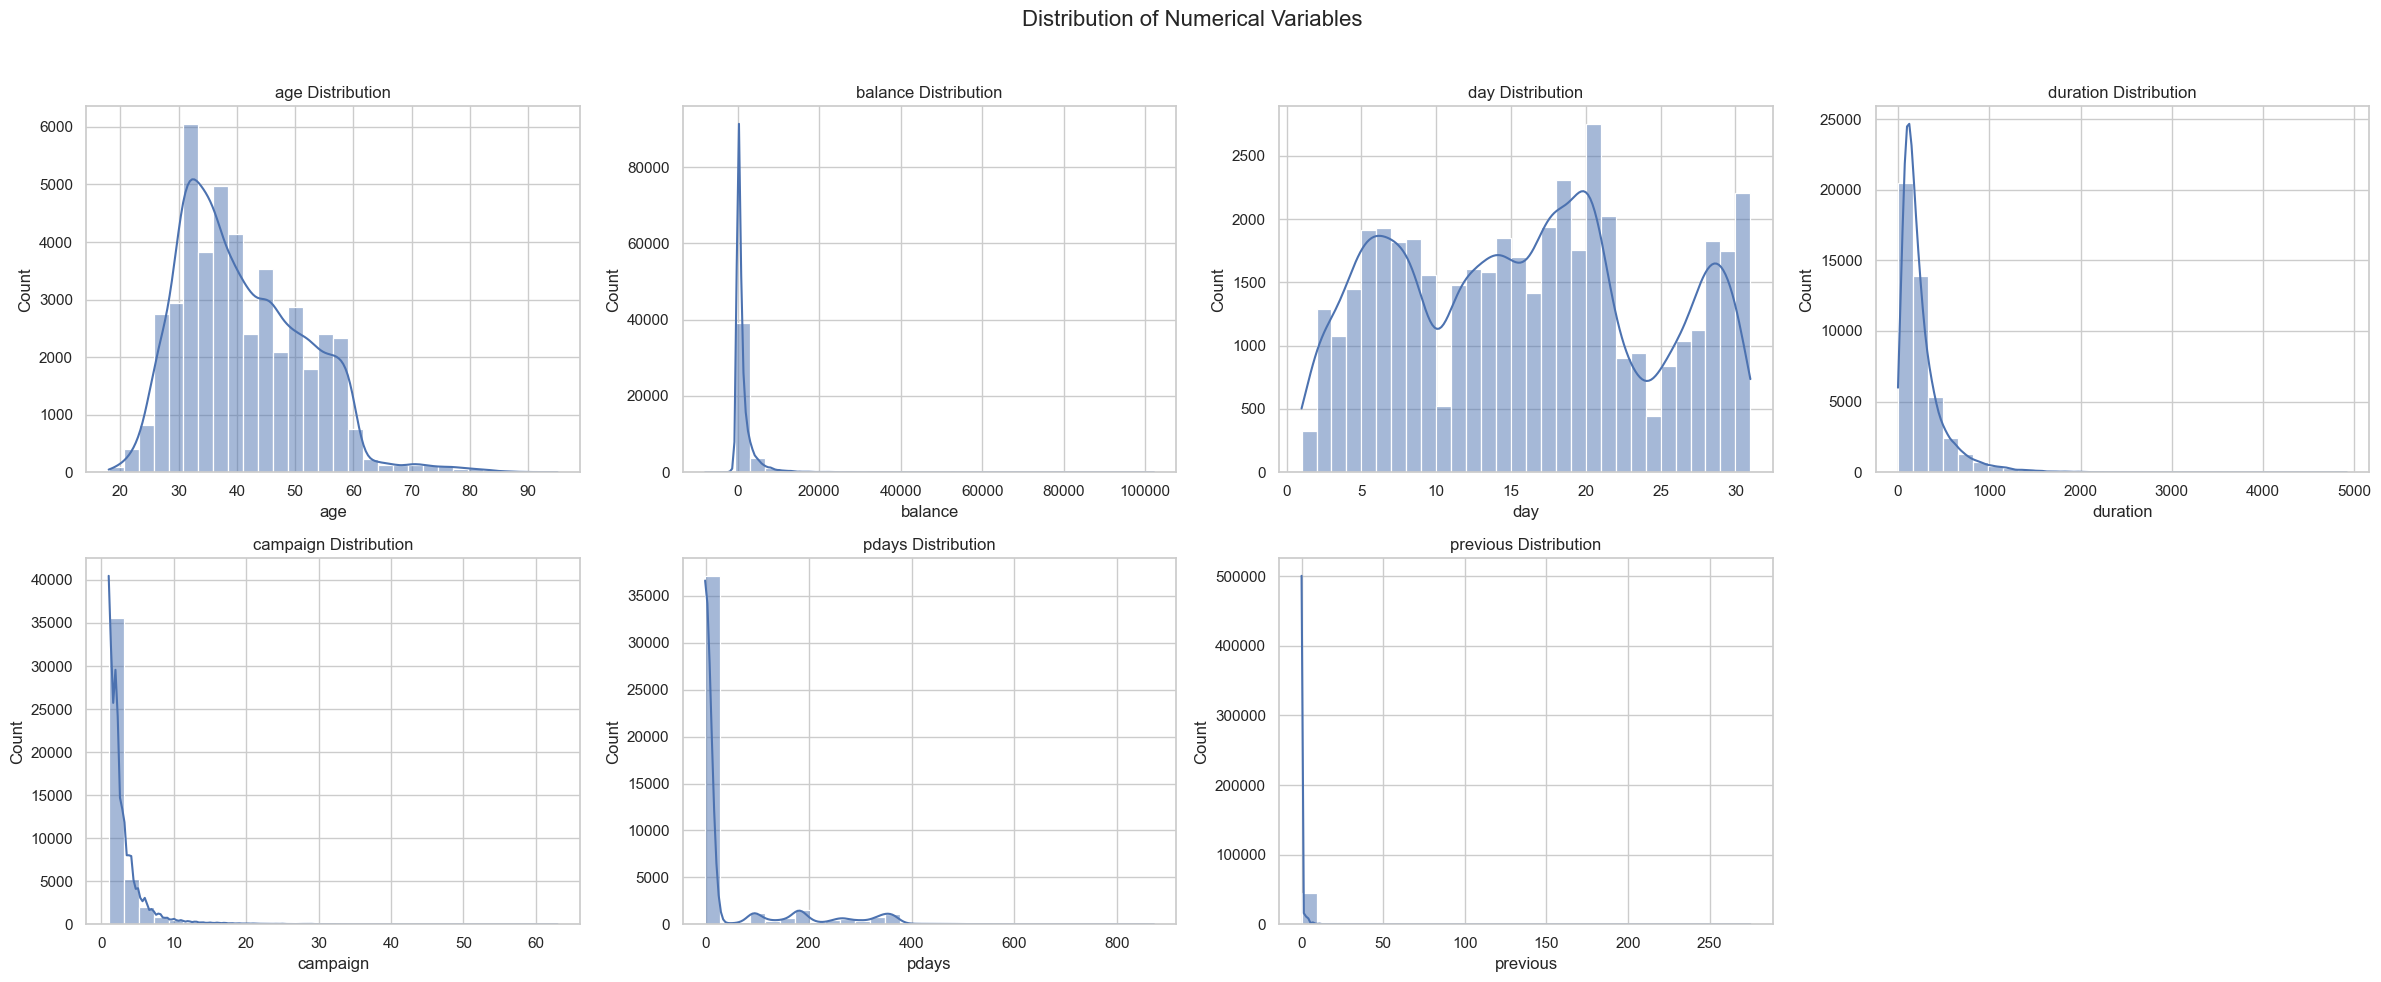

In [6]:
# Set the graphics style
sns.set(style="whitegrid")

# Numerical data visualization
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
num_rows = (len(numerical_vars) + 3) // 4  # Calculate the number of rows required
fig1, axes1 = plt.subplots(num_rows, 4, figsize=(24, num_rows * 5))
fig1.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_vars):
    row = i // 4
    col = i % 4
    sns.histplot(df[var], bins=30, kde=True, ax=axes1[row, col])
    axes1[row, col].set_title(f'{var} Distribution')

# Hide extra sub-images
if len(numerical_vars) % 4 != 0:
    for i in range(len(numerical_vars) % 4, 4):
        fig1.delaxes(axes1[num_rows - 1, i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

When visualizing the distribution of each feature, we found that the data distribution of the two features `pdays` and `previous` is relatively concentrated. Specifically, the values ​​of `pdays` are mostly -1, while the values ​​of `previous` are mostly 0. Although this concentrated distribution gives us a preliminary understanding of the overall situation of the data, it also obscures the distribution characteristics of other values ​​except -1 and 0.

In order to have a deeper understanding of the complete distribution of these two features, we plan to process the data of `pdays` and `previous` separately. For `pdays`, we will remove the data with a value of -1; for `previous`, we will remove the data with a value of 0.

In addition, there are many discrete values ​​in the remaining data after removing 0 from `previous`. In order to observe and analyze the distribution law of these data more clearly, we will perform a logarithmic transformation on the processed `previous` data. Through this operation, we hope to be able to grasp the data distribution of these two features more comprehensively and meticulously.

C:\Users\connell\AppData\Local\Temp\ipykernel_23372\4126952300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_previous['previous_log'] = np.log1p(df_filtered_previous['previous'])


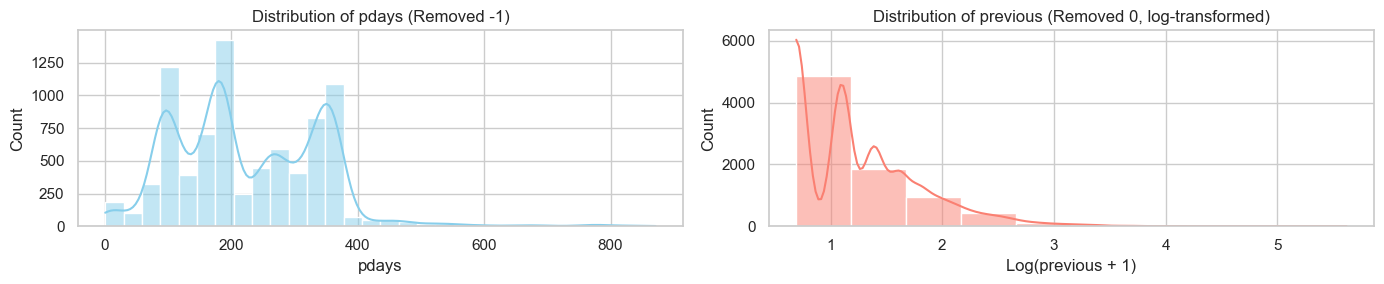

In [7]:
# Copy the dataset
df_filtered_pdays = df[df['pdays'] != -1]  # Remove pdays=-1
df_filtered_previous = df[df['previous'] != 0]  # Remove previous=0
# Logarithmically transform the previous column
df_filtered_previous['previous_log'] = np.log1p(df_filtered_previous['previous'])

# Set the drawing style
sns.set(style="whitegrid")

# Create subgraph
fig, axes = plt.subplots(1, 2, figsize=(14, 3))

# 📌 Visualize pdays (after removing -1)
sns.histplot(df_filtered_pdays['pdays'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of pdays (Removed -1)')
axes[0].set_xlabel('pdays')
axes[0].set_ylabel('Count')

# 📌 Visualize previous (after removing 0)
sns.histplot(df_filtered_previous['previous_log'], bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of previous (Removed 0, log-transformed)')
axes[1].set_xlabel('Log(previous + 1)')
axes[1].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()

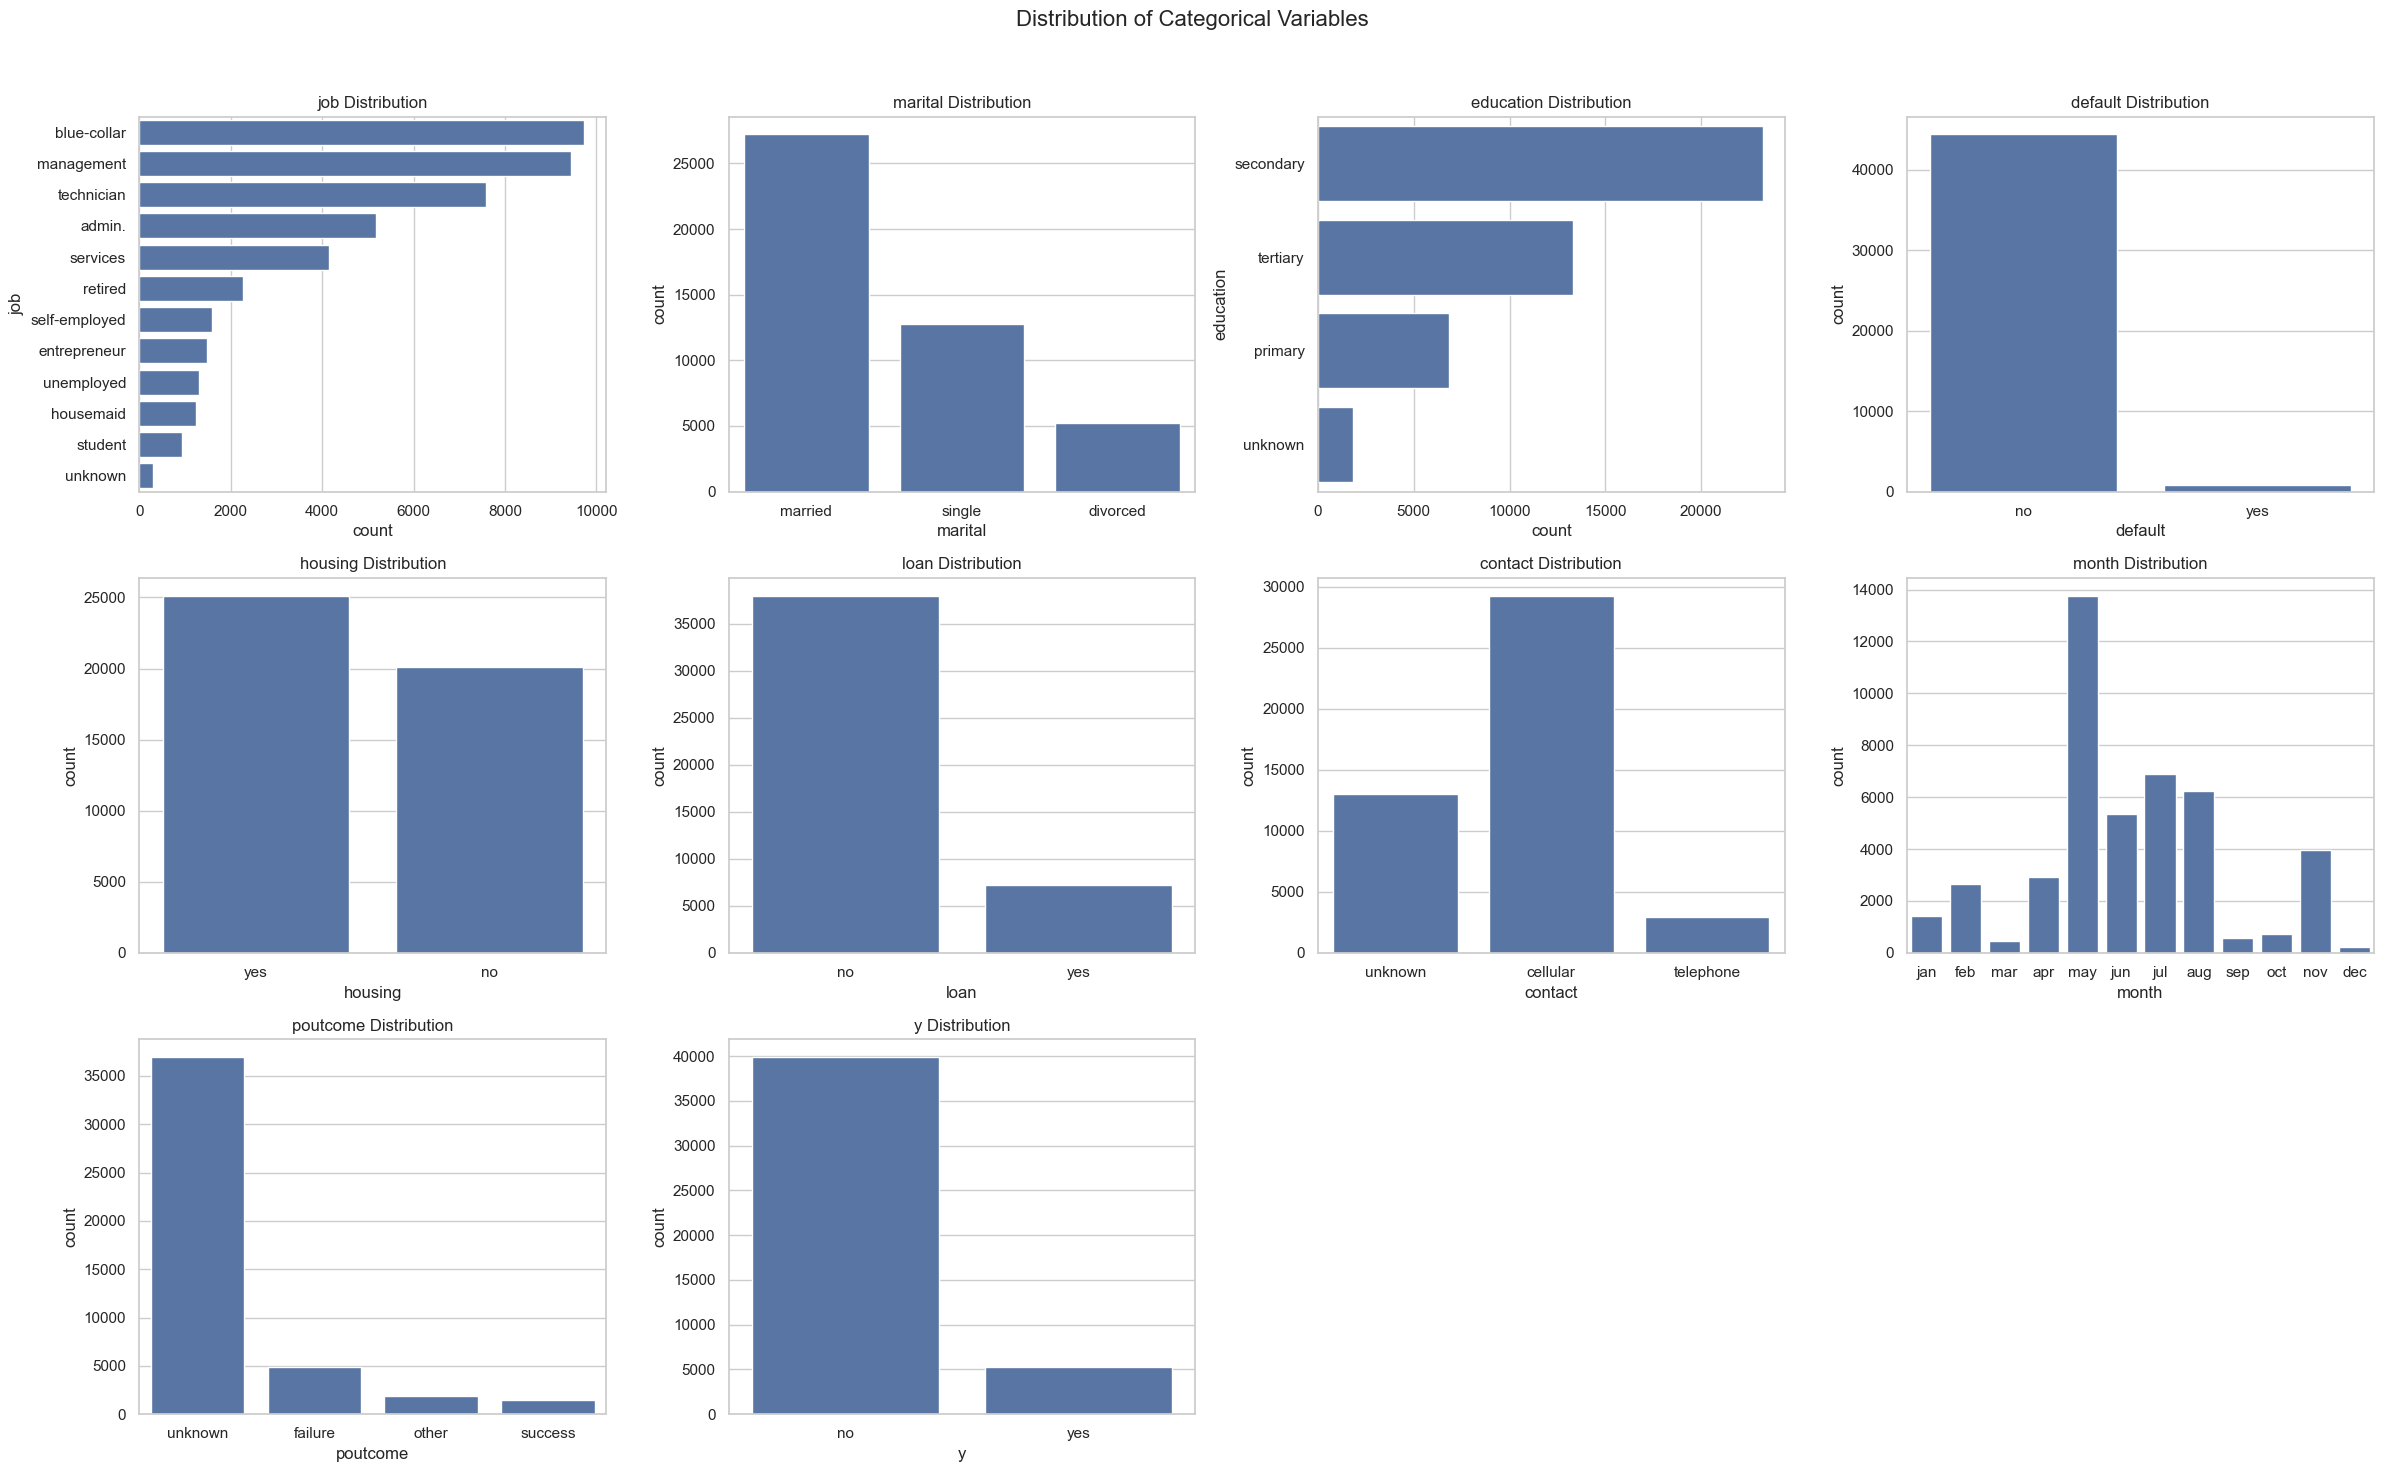

In [8]:
# Set the graphics style
sns.set(style="whitegrid")

# Visualization of categorical data
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
num_rows = (len(categorical_vars) + 3) // 4  # Calculate the number of rows required
fig2, axes2 = plt.subplots(num_rows, 4, figsize=(24, num_rows * 5))
fig2.suptitle('Distribution of Categorical Variables', fontsize=16)

for i, var in enumerate(categorical_vars):
    row = i // 4
    col = i % 4
    if var in ['job', 'education']:
        sns.countplot(y=var, data=df, ax=axes2[row, col], order=df[var].value_counts().index)
    elif var == 'month':
        sns.countplot(x=var, data=df, ax=axes2[row, col], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    else:
        sns.countplot(x=var, data=df, ax=axes2[row, col])
    axes2[row, col].set_title(f'{var} Distribution')

# Hide extra sub-images
if len(categorical_vars) % 4 != 0:
    for i in range(len(categorical_vars) % 4, 4):
        fig2.delaxes(axes2[num_rows - 1, i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 2.2 individual feature related to subscription

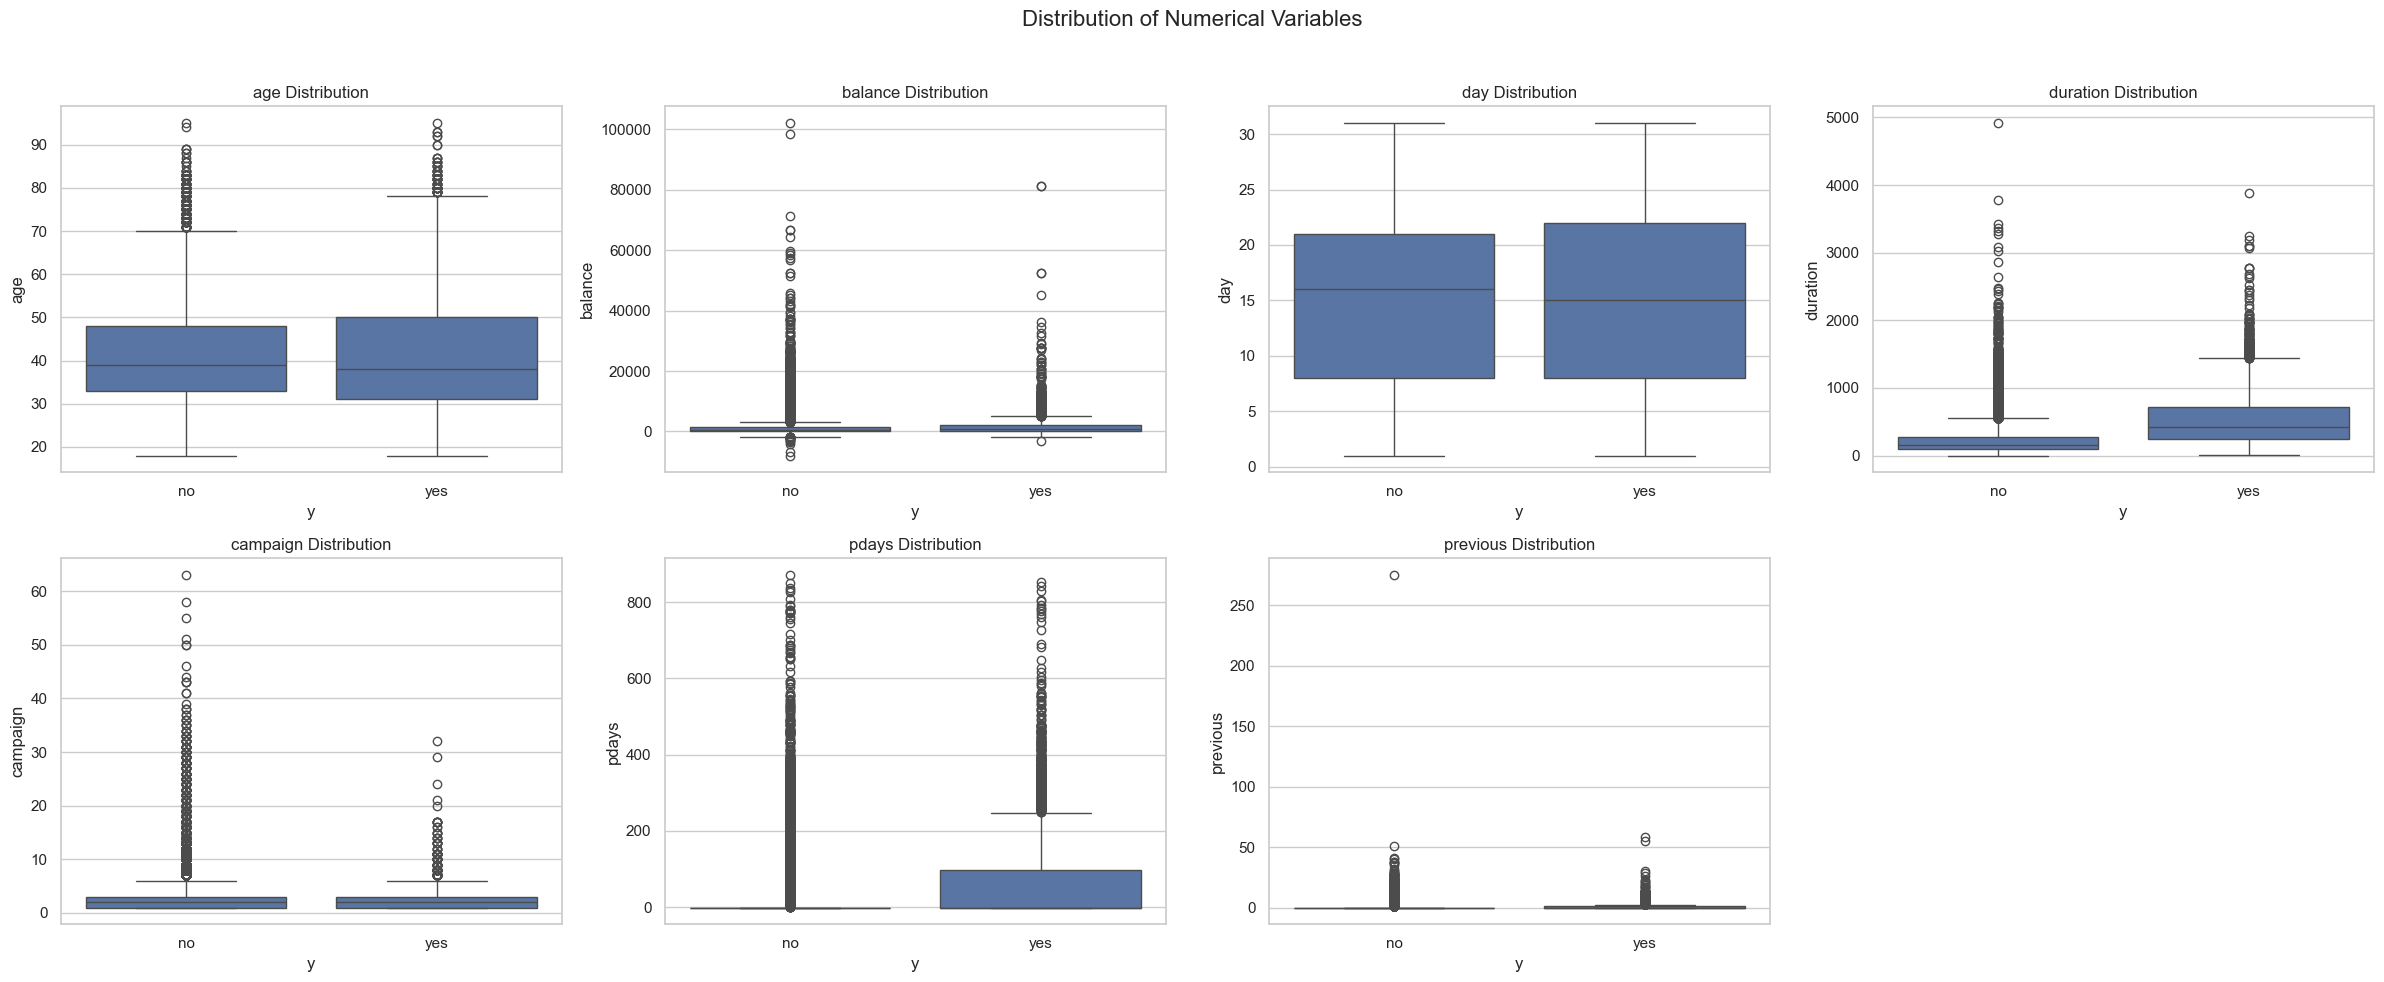

In [9]:
# Set the graphics style
sns.set(style="whitegrid")

# Numerical data visualization
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
num_rows = (len(numerical_vars) + 3) // 4  # Calculate the number of rows required
fig1, axes1 = plt.subplots(num_rows, 4, figsize=(24, num_rows * 5))
fig1.suptitle('Distribution of Numerical Variables', fontsize=16)

for i, var in enumerate(numerical_vars):
    row = i // 4
    col = i % 4
    sns.boxplot(x='y', y=var, data=df, ax=axes1[row, col])
    axes1[row, col].set_title(f'{var} Distribution')

# Hide extra sub-images
if len(numerical_vars) % 4 != 0:
    for i in range(len(numerical_vars) % 4, 4):
        fig1.delaxes(axes1[num_rows - 1, i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

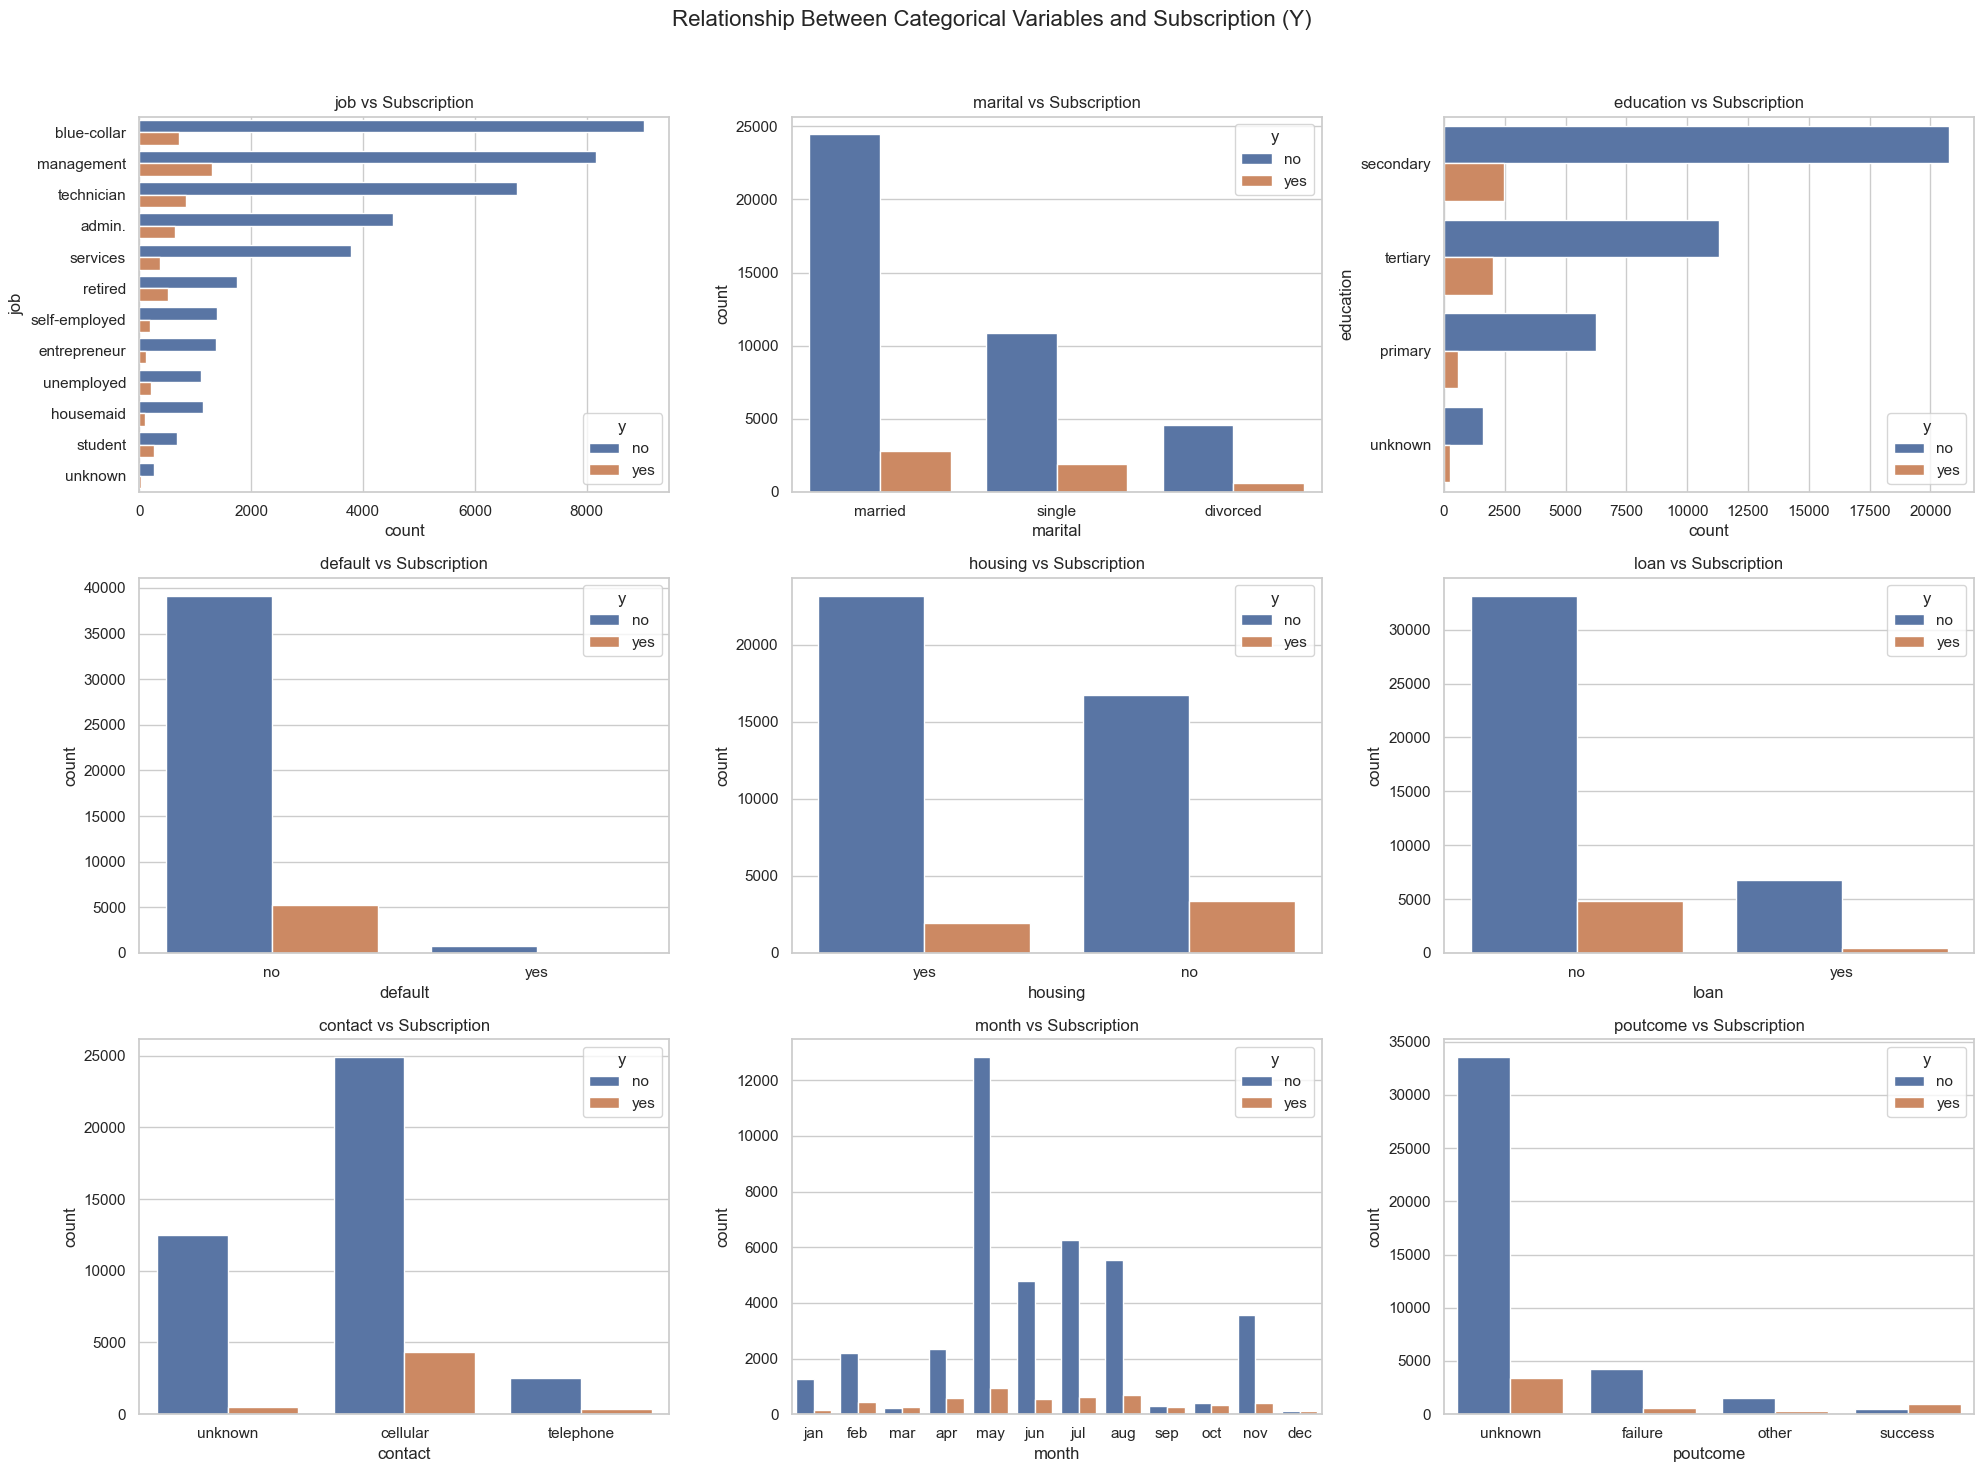

In [10]:
# Set the graphics style
sns.set(style="whitegrid")

# Visualization of categorical data
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_rows = (len(categorical_vars) + 2) // 3
fig2, axes2 = plt.subplots(num_rows, 3, figsize=(20, 15))
fig2.suptitle('Relationship Between Categorical Variables and Subscription (Y)', fontsize=16)

for i, var in enumerate(categorical_vars):
    row = i // 3
    col = i % 3
    if var in ['job', 'education']:
        sns.countplot(y=var, hue='y', data=df, ax=axes2[row, col], order=df[var].value_counts().index)
    elif var == 'month':
        sns.countplot(x=var, hue='y', data=df, ax=axes2[row, col], order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
    else:
        sns.countplot(x=var, hue='y', data=df, ax=axes2[row, col])
    axes2[row, col].set_title(f'{var} vs Subscription')

# Hide empty subplots
if len(categorical_vars) % 3 != 0:
    for i in range(len(categorical_vars) % 3, 3):
        fig2.delaxes(axes2[num_rows - 1, i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 2.3 Feature Correlation

In [11]:
label_encoded_df =df.copy()
# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to apply label encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome', 'y']

# Apply label encoding to each categorical column
for column in categorical_columns:
    label_encoded_df[column] = label_encoder.fit_transform(label_encoded_df[column])

#deal with time variable(month, day_of_week)
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Mapping Values
label_encoded_df["month"] = label_encoded_df["month"].map(month_mapping)

# Check the updated dataframe with encoded columns
print(label_encoded_df.head())


   age  job  marital  education  default  balance  housing  loan  contact   
0   58    4        1          2        0     2143        1     0        2  \
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      5       261         1     -1         0         3  0  
1    5      5       151         1     -1         0         3  0  
2    5      5        76         1     -1         0         3  0  
3    5      5        92         1     -1         0         3  0  
4    5      5       198         1     -1         0         3  0  


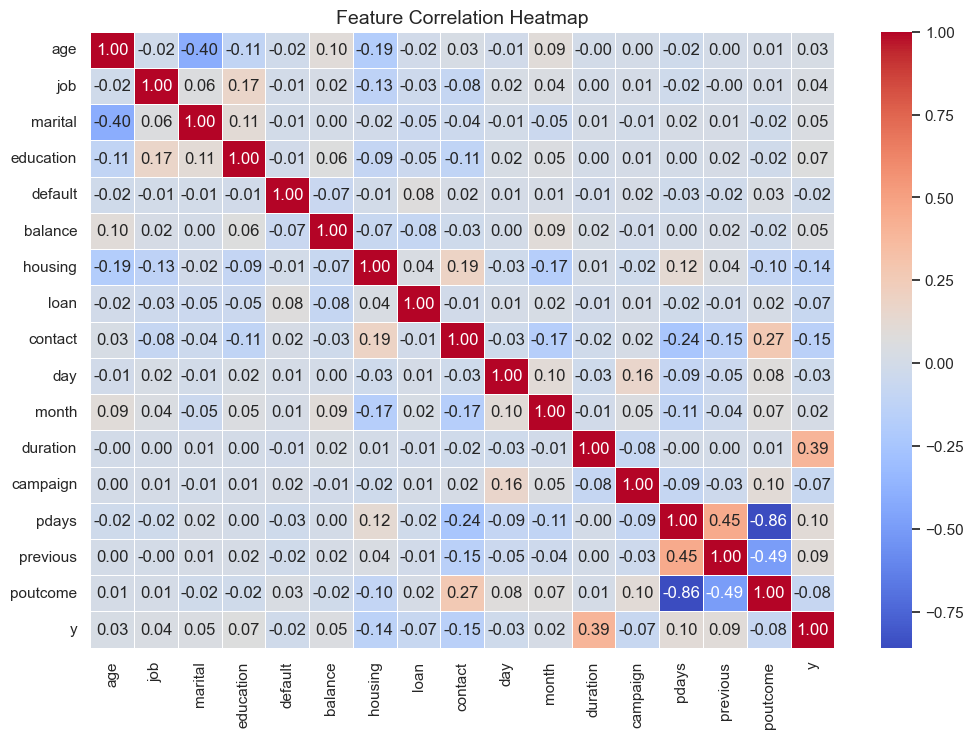

In [12]:
corr_matrix = label_encoded_df.corr()
plt.figure(figsize=(12, 8))

# Heat Map
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Title
plt.title("Feature Correlation Heatmap", fontsize=14)

# show image
plt.show()

### 2.4 Interaction values with subcription visualisation
1. age&martial
2. job&education
3. housing&contact
4. contact&poutcome
5. previous&pdays
6. pdays&poutcome
7. poutcome&previous

#### 2.4.1 subscription rate of age&martial

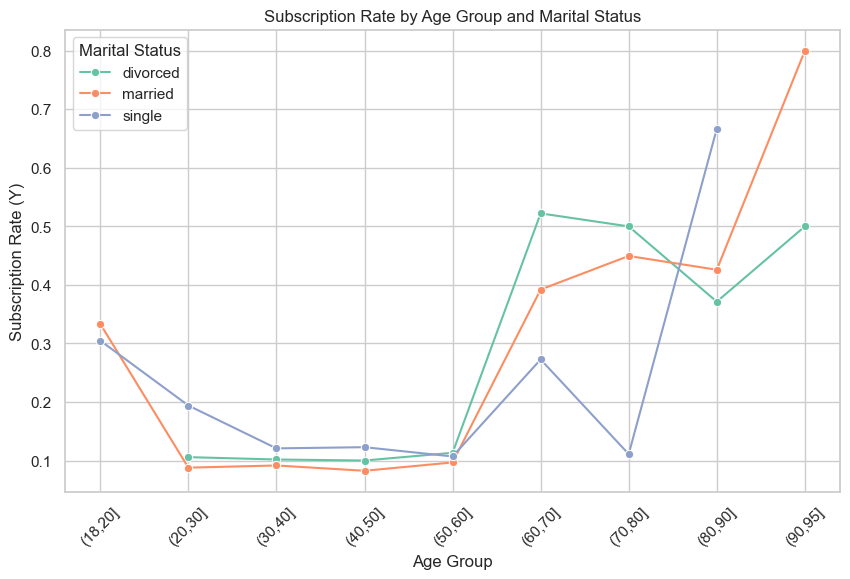

In [13]:
y_encoded_df = df.copy()

# Convert y to numeric type: 'yes' -> 1, 'no' -> 0
y_encoded_df['y'] = y_encoded_df['y'].map({'yes': 1, 'no': 0})

# # Divide age into bins (e.g., 10-year intervals)
bins = [18, 20] + list(range(30, 100, 10)) + [95]  # First add (18, 20], then continue with the 10-year interval
labels = [f"({bins[i]},{bins[i+1]}]" for i in range(len(bins)-1)]  # Generate labels that conform to the cut rules
y_encoded_df['age_group'] = pd.cut(y_encoded_df['age'], bins=bins, labels=labels, ordered=True)

# Group by marital and age_group and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['marital', 'age_group'])['y'].mean().reset_index()

# Convert age_group to string type
grouped_data['age_group'] = grouped_data['age_group'].astype(str)

# Draw a grouped bar chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='y', hue='marital', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Marital Status')
plt.grid(True)  # Add grid lines
plt.xticks(rotation=45)
plt.show()

In [14]:
# Corrected bin edges (remove duplicate 20)
bins = [18, 20, 30, 40, 50, 60, 70, 80, 90, 95]  # Unique bin edges
labels = [f"({bins[i]},{bins[i+1]}]" for i in range(len(bins)-1)]  # Generate labels

# Apply pd.cut() with corrected bins
y_encoded_df['age_group'] = pd.cut(
    y_encoded_df['age'], 
    bins=bins, 
    labels=labels, 
    ordered=True, 
    include_lowest=True  # Ensure the first bin includes 18
)

# Verify the result
print(y_encoded_df['age_group'].value_counts())

age_group
(30,40]    17687
(40,50]    11239
(50,60]     8067
(20,30]     6933
(60,70]      701
(70,80]      388
(18,20]       97
(80,90]       92
(90,95]        7
Name: count, dtype: int64


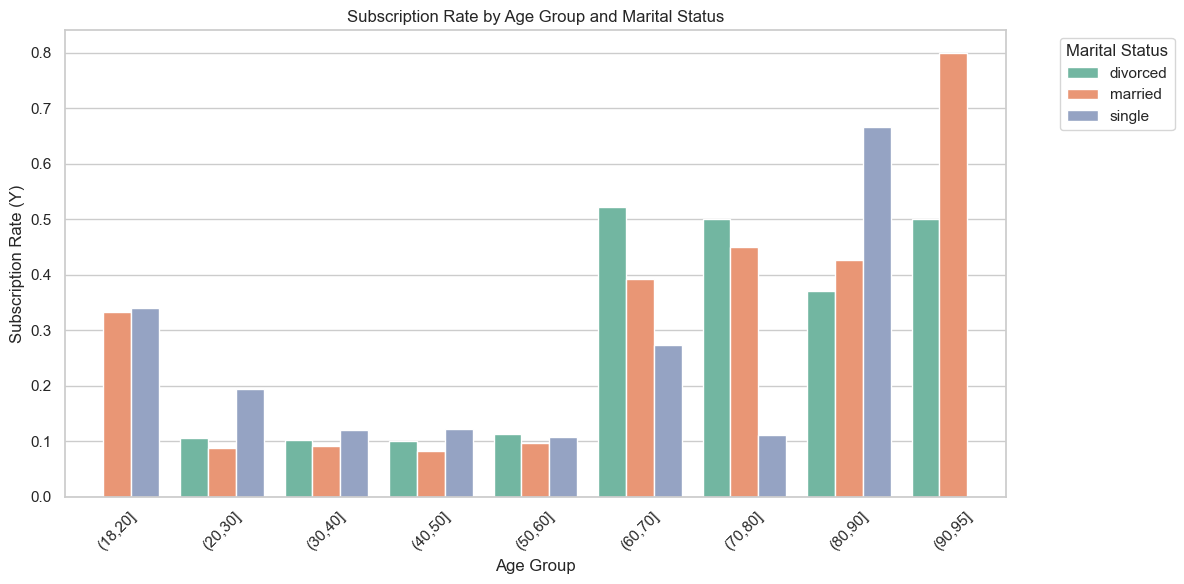

In [15]:
# Group by marital and age_group and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['marital', 'age_group'])['y'].mean().reset_index()

# Convert age_group to string type
grouped_data['age_group'] = grouped_data['age_group'].astype(str)

# Draw a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='age_group', 
    y='y', 
    hue='marital', 
    data=grouped_data, 
    palette='Set2'
)
plt.title('Subscription Rate by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.4.2 subscription rate of education & job type

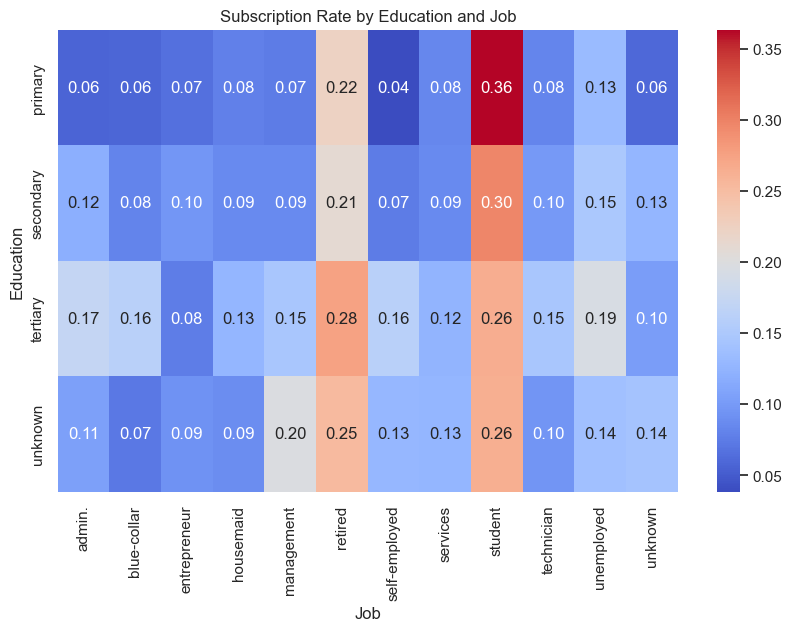

In [16]:
# Group by education and job and calculate the mean of y
heatmap_data = y_encoded_df.groupby(['education', 'job'])['y'].mean().unstack()

# Draw a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Subscription Rate by Education and Job')
plt.xlabel('Job')
plt.ylabel('Education')
plt.show()

#### 2.4.3 Subscription Distribution of Default & Contact Type

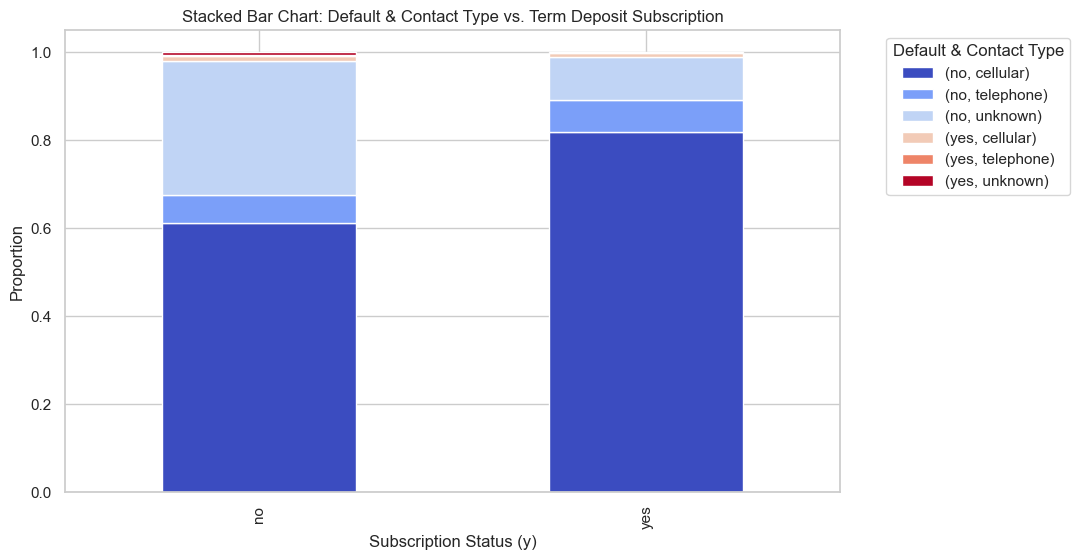

In [17]:
# Create a crosstab for stacked bar chart
df_grouped = pd.crosstab(index=[df['y']], columns=[df['default'], df['contact']])

# Normalize to get proportions
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0)

# Plot the stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="coolwarm")

# Labels and title
plt.xlabel("Subscription Status (y)")
plt.ylabel("Proportion")
plt.title("Stacked Bar Chart: Default & Contact Type vs. Term Deposit Subscription")
plt.legend(title="Default & Contact Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### 2.4.4 Subscription Rate by Contact Type & Month

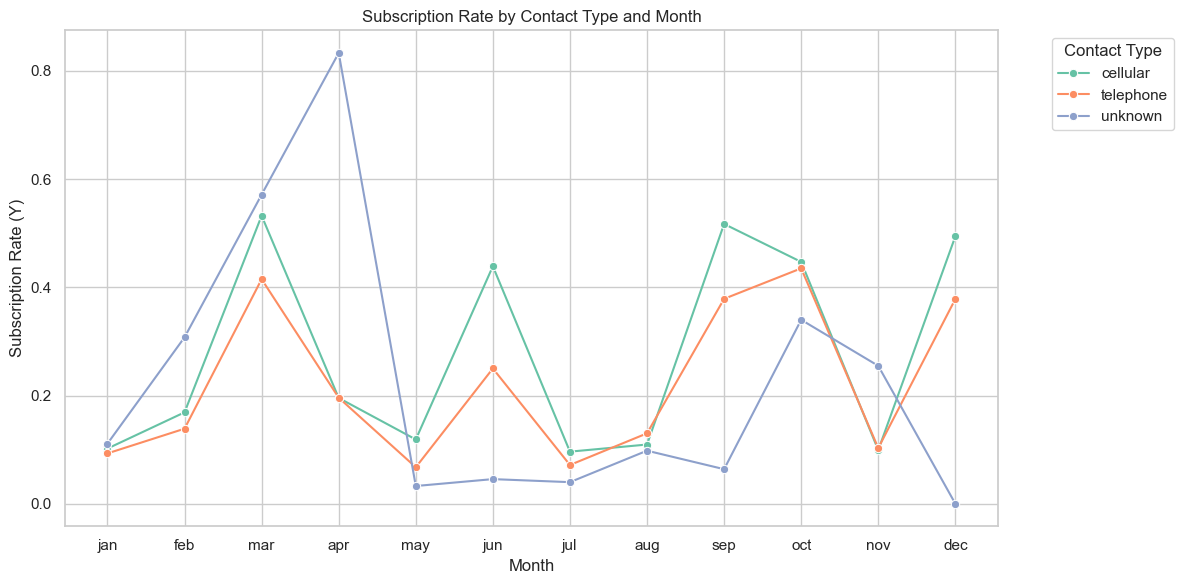

In [18]:
# Define the correct order of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert the month column to an ordinal categorical variable
y_encoded_df['month'] = pd.Categorical(y_encoded_df['month'], categories=month_order, ordered=True)
# Group by contact and month and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['contact', 'month'])['y'].mean().reset_index()
# Draw a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='y', hue='contact', data=grouped_data, palette='Set2', marker='o')
plt.title('Subscription Rate by Contact Type and Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Contact Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Adding Grid Lines
plt.tight_layout()
plt.show()

In [19]:
y_encoded_df = df.copy()

# Convert y to numeric type: 'yes' -> 1, 'no' -> 0
y_encoded_df['y'] = y_encoded_df['y'].map({'yes': 1, 'no': 0})

# 1. Binning previous
previous_bins = [0, 1, 2, 3, 5, 275]
previous_labels = ['0', '1', '2', '3 - 4', '5 - 275']
y_encoded_df['previous_bin'] = pd.cut(y_encoded_df['previous'], bins=previous_bins, labels=previous_labels, include_lowest=True, right=False)

# 2. Bin pdays and specify the order of categories

def categorize_pdays(pdays):
    if pdays == -1:
        return "Never Contacted"
    elif pdays <= 90:
        return "3 months"
    elif pdays <= 180:
        return "6 months"
    elif pdays <= 365:
        return "1 year"
    else:
        return "1+ year"

y_encoded_df['pdays_bin'] = y_encoded_df['pdays'].apply(categorize_pdays)

# View the amount of data for each group
grouped_counts = y_encoded_df.groupby(['previous_bin','pdays_bin']).size().reset_index(name='count')
print(grouped_counts)

   previous_bin        pdays_bin  count
0             0           1 year      0
1             0          1+ year      0
2             0         3 months      0
3             0         6 months      0
4             0  Never Contacted  36954
5             1           1 year   1580
6             1          1+ year    249
7             1         3 months    227
8             1         6 months    716
9             1  Never Contacted      0
10            2           1 year   1131
11            2          1+ year    194
12            2         3 months    152
13            2         6 months    629
14            2  Never Contacted      0
15        3 - 4           1 year    936
16        3 - 4          1+ year    129
17        3 - 4         3 months    170
18        3 - 4         6 months    621
19        3 - 4  Never Contacted      0
20      5 - 275           1 year    768
21      5 - 275          1+ year     71
22      5 - 275         3 months    169
23      5 - 275         6 months    514


### 3. Calculating the average subscription rate after grouping

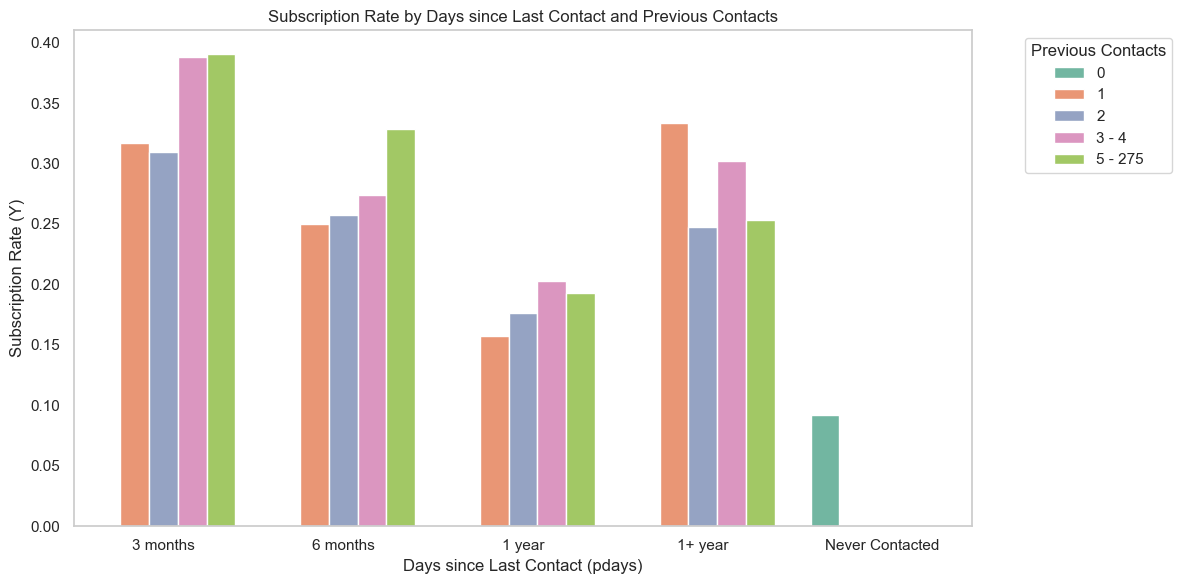

In [20]:
grouped_data = y_encoded_df.groupby(['previous_bin', 'pdays_bin'])['y'].mean().reset_index()

# 4. Ensure that the x-axis is in the specified order
pdays_order = ["3 months", "6 months", "1 year","1+ year", "Never Contacted"]

# 5. Draw a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='pdays_bin', y='y', hue='previous_bin', data=grouped_data, palette='Set2', order=pdays_order)

# 6. Chart beautification
plt.title('Subscription Rate by Days since Last Contact and Previous Contacts')
plt.xlabel('Days since Last Contact (pdays)')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Previous Contacts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')  # Show only y-axis grid lines
# plt.xticks(rotation=30)  # Rotate the x-axis labels to improve readability
plt.tight_layout()
plt.show()


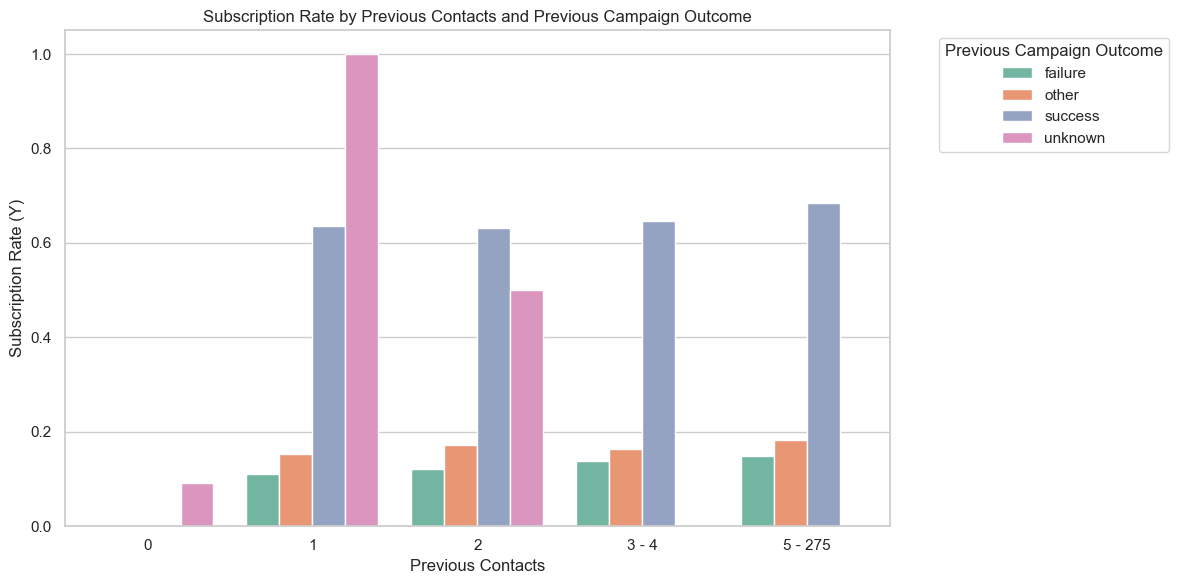

In [21]:
# Group by poutcome and previous and calculate the mean of y (subscription ratio)
grouped_data = y_encoded_df.groupby(['poutcome', 'previous_bin'])['y'].mean().reset_index()

# Draw a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='previous_bin', y='y', hue='poutcome', data=grouped_data, palette='Set2')
plt.title('Subscription Rate by Previous Contacts and Previous Campaign Outcome')
plt.xlabel('Previous Contacts')
plt.ylabel('Subscription Rate (Y)')
plt.legend(title='Previous Campaign Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Train,Test and splitting the data

In [23]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop('y', axis=1)  # Drop the target column
y = df['y']  # Target column

# Split the data (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (36168, 16) (36168,)
Testing set shape: (9043, 16) (9043,)


## Data Encoded

In [24]:
for col in df.columns:
    print(col,df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [25]:
coded_df = df.copy()

# Make sure all categorical variables are of string type
categorical_cols = ["job", "marital", "education", "default", "housing", "loan",
                    "contact", "month", "poutcome"]
coded_df[categorical_cols] = coded_df[categorical_cols].astype(str)

# 1. Handling binary variables (default, housing, loan)
binary_cols = ["default", "housing", "loan", "contact", "poutcome"]
for col in binary_cols:
    if col == "contact":
        coded_df[col] = coded_df[col].map({"telephone": 1, "cellular": 2, "unknown":0})
    elif col == "poutcome":
        coded_df[col] = coded_df[col].map({"unknown": 0, "failure": -1, "success": 1, "other":2})
    else:
        coded_df[col] = coded_df[col].map({"no": -1, "yes": 1, "unknown": 0})  # Handling unknown values

# 2. deal with time variable(month, day_of_week)
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

# Mapping Values
coded_df["month"] = coded_df["month"].map(month_mapping)

# 3. One-Hot Encoding of the remaining categorical variables
onehot_cols = ["job", "marital", "education"]
encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore")
encoded_features = encoder.fit_transform(coded_df[onehot_cols])

# Creating One-Hot DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(onehot_cols))

# 4. Merge One-Hot Encoded Data
coded_df = coded_df.drop(columns=onehot_cols).reset_index(drop=True)
coded_df = pd.concat([coded_df, encoded_df], axis=1)

# 5. Target variable encoding
coded_df["y"] = coded_df["y"].map({"no": 0, "yes": 1})

# coded_df.to_csv("bank_processed.csv", index=False)

# 6. View the encoded data
coded_df.head()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,-1,2143,1,-1,0,5,5,261,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,44,-1,29,1,-1,0,5,5,151,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,33,-1,2,1,1,0,5,5,76,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,47,-1,1506,1,-1,0,5,5,92,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,33,-1,1,-1,-1,0,5,5,198,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


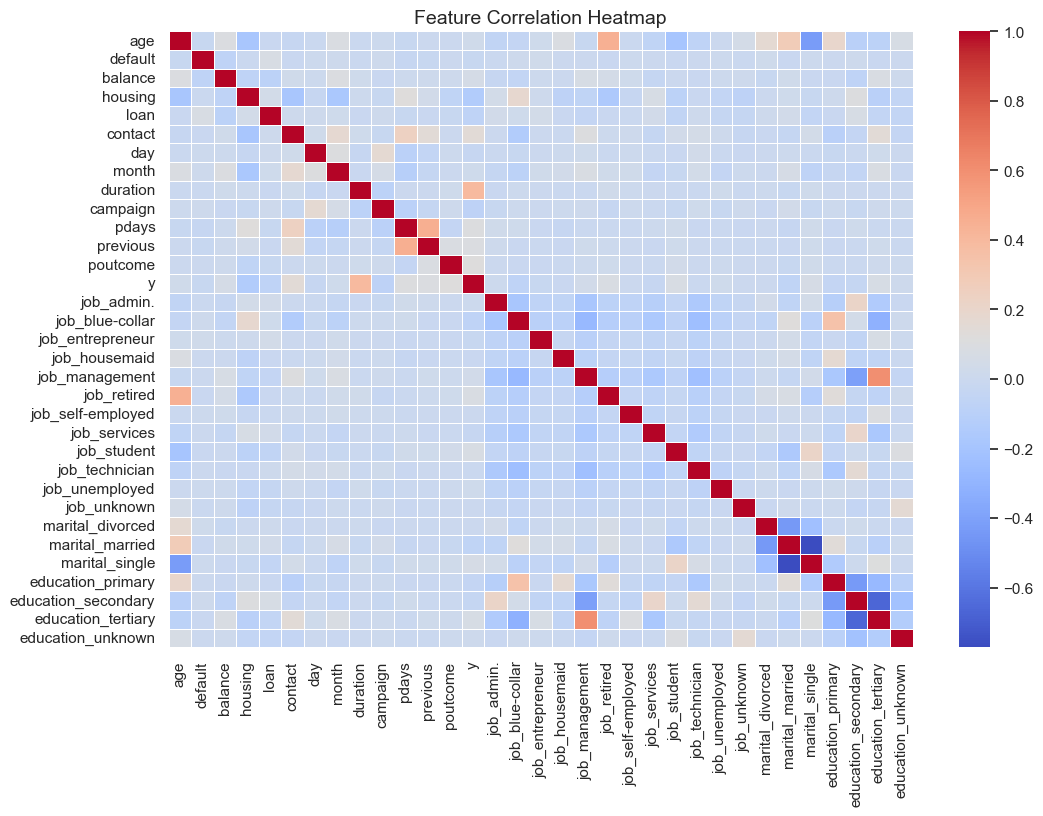

In [26]:
# Calculate the correlation coefficient matrix
corr_matrix = coded_df.corr()

# Set the graphics size
plt.figure(figsize=(12, 8))

# Draw a heat map
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Set the title
plt.title("Feature Correlation Heatmap", fontsize=14)

# Display the image
plt.show()

# Feature Importance

## Train & Test Data Split

In [27]:
# Split features (X) and target variable (y)
# X = coded_df.drop(columns=["y"])
X = coded_df.drop(columns=["y","contact","day","month","duration","campaign","pdays","previous","poutcome"])
y = coded_df["y"]

# 80% training set, 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [39]:
# Convert data to DMatrix format (optional, but recommended for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter grid for Grid Search
params = {
    'objective': 'binary:logistic',  # Suitable for binary classification tasks
    'eval_metric': 'logloss',  # Evaluation indicators
    'max_depth': 5,  # Default value, will be overridden in CV
    'eta': 0.1,  # Default value, will be overridden in CV
    'subsample': 0.8,  # Default value, will be overridden in CV
    'colsample_bytree': 0.8  # Default value, will be overridden in CV
}

# Perform Grid Search using XGBoost's CV function
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,  # Maximum number of boosting rounds
    nfold=5,  # Number of cross-validation folds
    metrics='logloss',  # Evaluation metric
    as_pandas=True,  # Return results as a pandas DataFrame
    seed=42,  # Random seed for reproducibility
    early_stopping_rounds=10  # Early stopping if no improvement
)

# Print the best number of boosting rounds
best_num_boost_rounds = cv_results.shape[0]
print(f"Best Number of Boosting Rounds: {best_num_boost_rounds}")

# Train the final model with the best number of boosting rounds
final_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_num_boost_rounds
)

# Predict using the final model
dtest = xgb.DMatrix(X_test)
y_pred_proba = final_model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {acc:.4f}")

Best Number of Boosting Rounds: 83
XGBoost Accuracy: 0.8790


In [42]:
# Defining the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective="binary:logistic",  # Suitable for binary classification tasks
    eval_metric="logloss",  # Evaluation indicators
)

# model training
xgb_clf.fit(X_train, y_train)

# predict
y_pred = xgb_clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuary: {acc:.4f}")

XGBoost Accuary: 0.8792


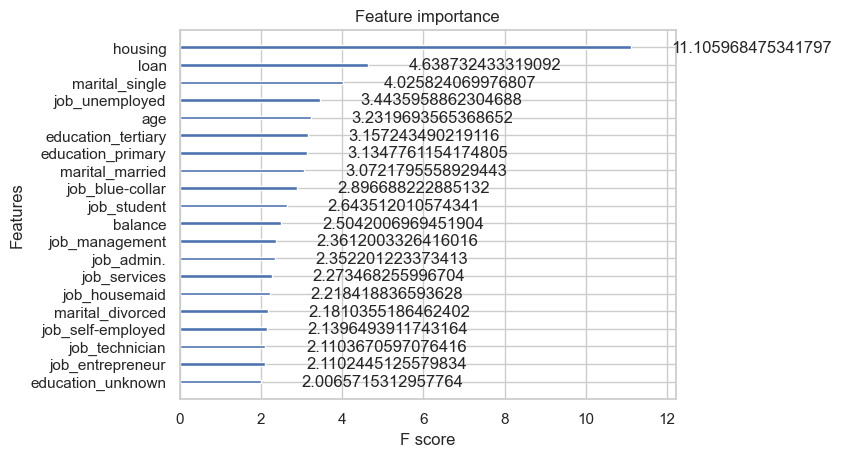

In [43]:
xgb.plot_importance(xgb_clf, importance_type="gain", max_num_features=20)  # top 20 features
plt.show()

 96%|=================== | 8718/9043 [00:16<00:00]       

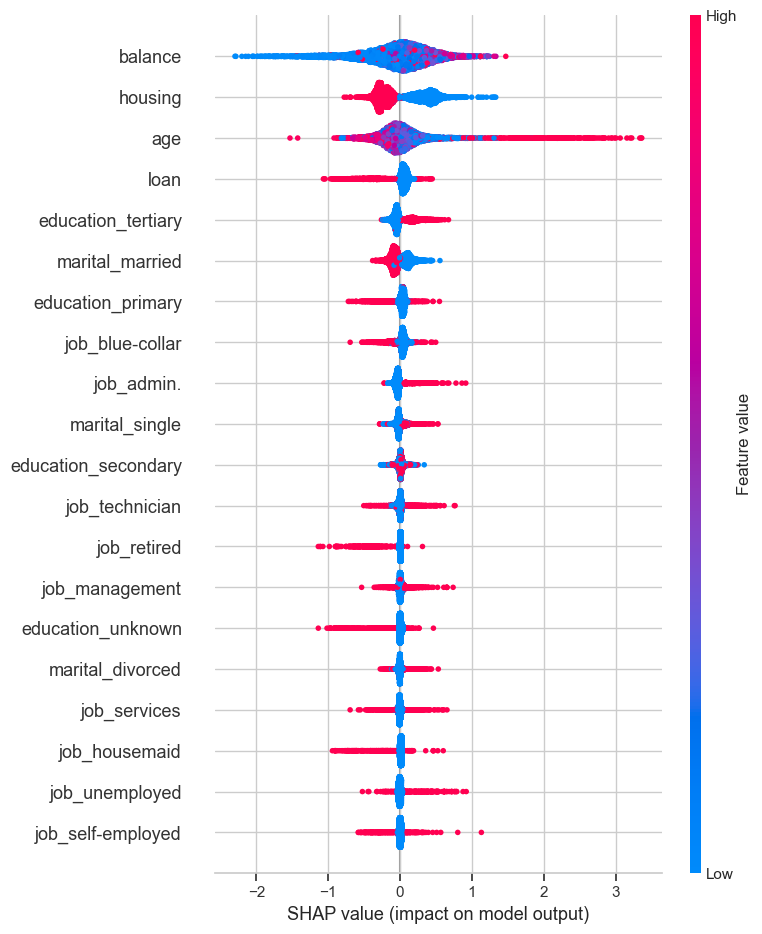

In [30]:
# Calculating SHAP Values
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_test)

# Draw the overall impact
shap.summary_plot(shap_values, X_test)

**Vertical axis**: variable name (sorted by interaction SHAP importance).

**Horizontal axis**: interaction SHAP value (positive value indicates positive contribution to y=1, negative value indicates greater contribution to y=0).

**Color**: feature value size (red = larger value, blue = smaller value).

**Distribution of points**: The denser the points, the more stable the interaction effect of the feature.

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Defining the Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of each tree (None means no limit)
    min_samples_split=2,  # Minimum number of samples required to split a node
    min_samples_leaf=1,   # Minimum number of samples required at each leaf node
    random_state=42       # Random seed for reproducibility
)

# Model training
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.8735


In [35]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

balance                0.569890
age                    0.298139
housing                0.025021
loan                   0.011716
education_secondary    0.006407
education_tertiary     0.006310
job_technician         0.006264
job_admin.             0.005777
marital_married        0.005620
job_blue-collar        0.005474
job_management         0.005342
marital_single         0.005326
job_retired            0.005109
education_primary      0.005041
job_student            0.004773
marital_divorced       0.004739
job_services           0.004504
job_self-employed      0.004319
job_unemployed         0.004183
education_unknown      0.004125
job_entrepreneur       0.003428
default                0.003357
job_housemaid          0.003221
job_unknown            0.001918
dtype: float64


## Logistic Regression

In [ ]:
# 2. Build a logistic regression pipeline
model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42,class_weight="balanced"))
])

# 3. Training the Model
model.fit(X_train, y_train)

# 4. Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 5. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.6207010947694349
ROC AUC: 0.6751096058477353
              precision    recall  f1-score   support

           0       0.93      0.62      0.74      7952
           1       0.19      0.65      0.29      1091

    accuracy                           0.62      9043
   macro avg       0.56      0.63      0.52      9043
weighted avg       0.84      0.62      0.69      9043



In [32]:
# View features that influence ranking
feature_importance = model.named_steps["logreg"].coef_[0]
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)
print(importance_df)

                Feature  Importance
10          job_retired    0.141091
22   education_tertiary    0.097502
2               balance    0.096698
19       marital_single    0.091929
13          job_student    0.091635
5            job_admin.    0.047079
15       job_unemployed    0.043626
0                   age    0.031325
17     marital_divorced   -0.004211
9        job_management   -0.006505
23    education_unknown   -0.009118
11    job_self-employed   -0.010419
21  education_secondary   -0.013853
16          job_unknown   -0.022827
12         job_services   -0.023166
14       job_technician   -0.029943
8         job_housemaid   -0.037260
7      job_entrepreneur   -0.040368
1               default   -0.064766
6       job_blue-collar   -0.069060
18      marital_married   -0.081852
20    education_primary   -0.099247
4                  loan   -0.181618
3               housing   -0.351962


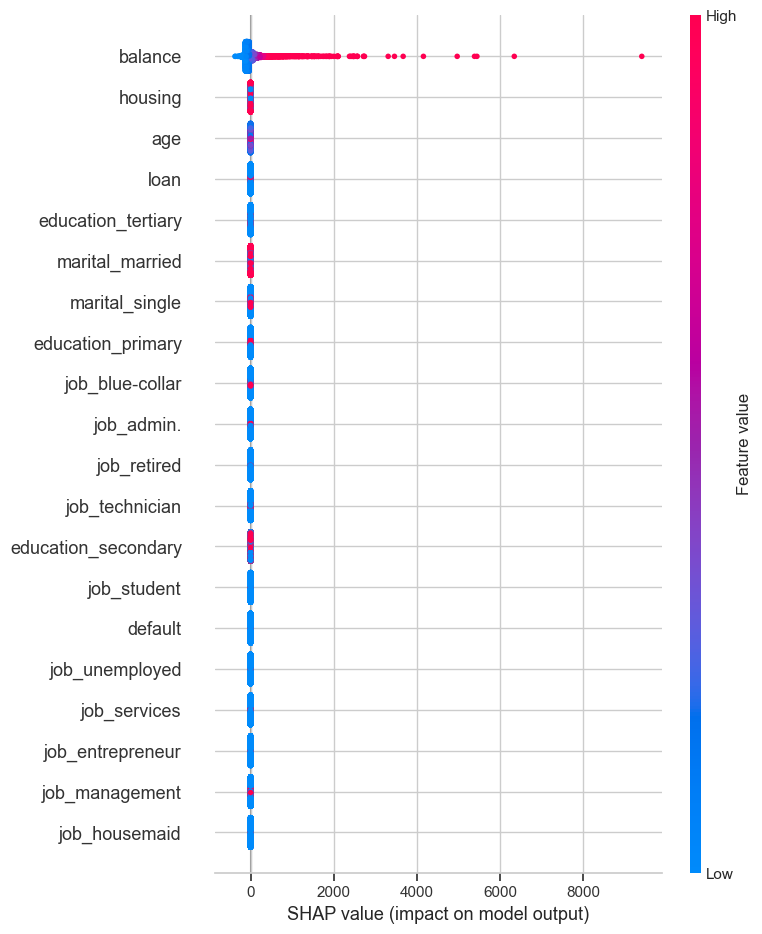

In [33]:
explainer = shap.LinearExplainer(model.named_steps["logreg"], X_train)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
plt.show()